## Loading the MNIST fashion data set


In [1]:
import tensorflow as tf
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Preprocess the data


In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the overfitting model

In [3]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)

])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()
# train the model
epochs = 5
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on

## Evaluate accuracy

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3454 - acc: 0.8790
Test accuracy: 0.879


## Training/test loss/accuracy during training

In [0]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

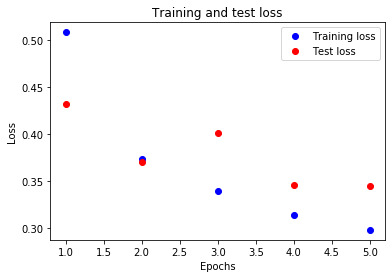

In [6]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

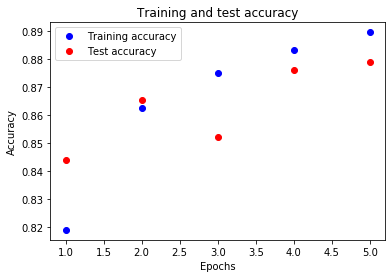

In [8]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Build the underfitting model**

In [9]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)

])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 5
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.9896 - acc: 0.6294 - val_loss: 0.7088 - val_acc: 0.7501
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6224 - acc: 0.7859 - val_loss: 0.6034 - val_acc: 0.7954
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5528 - acc: 0.8123 - val_loss: 0.5704 - val_acc: 0.8047
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5308 - acc: 0.8187 - val_loss: 0.5536 - val_acc: 0.8131
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5162 - acc: 0.8236 - val_loss: 0.5508 - val_acc: 0.8176


## Evaluate accuracy

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.5508 - acc: 0.8176
Test accuracy: 0.8176


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

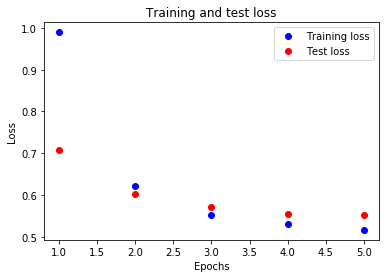

In [12]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

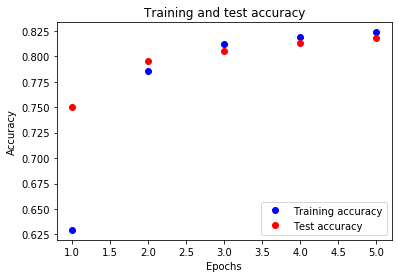

In [14]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Build the good model

In [15]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(132, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation=tf.nn.softmax)

])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5454 - acc: 0.8055 - val_loss: 0.4126 - val_acc: 0.8475
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3943 - acc: 0.8570 - val_loss: 0.4107 - val_acc: 0.8445
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3555 - acc: 0.8691 - val_loss: 0.4007 - val_acc: 0.8493
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3334 - acc: 0.8785 - val_loss: 0.3699 - val_acc: 0.8685
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3150 - acc: 0.8831 - val_loss: 0.3469 - val_acc: 0.8746
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2988 - acc: 0.8899 - val_loss: 0.3737 - val_acc: 0.8642
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2845 - acc: 0.8949 - val_loss: 0.

## Evaluate accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3228 - acc: 0.8867
Test accuracy: 0.8867


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

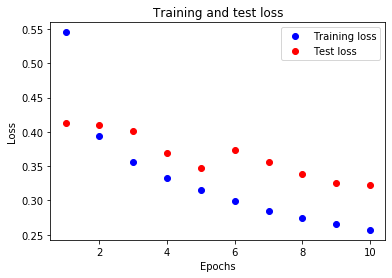

In [18]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

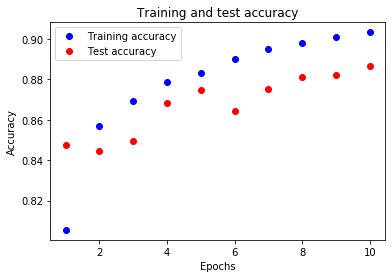

In [20]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()